# Reweighted loss functions for the neural flow diffusion model

## Variational diffusion models

### Definition of the forward process

Let's define the forward process

\begin{align}
    z = \alpha x + \sigma \varepsilon,
    \quad \text{where} \quad
    \alpha^2 + \sigma^2 = 1
\end{align}

Then we have the following connections:

\begin{align}
    x = \frac{z - \sigma \varepsilon}{\alpha}
    \quad \text{and} \quad
    \varepsilon = \frac{z - \alpha x}{\sigma}
\end{align}

### Signal-To-Noise Ratio (SNR)

Introduce the Signal-To-Noise Ratio (SNR)

\begin{align}
    SNR = \frac{\alpha^2}{\sigma^2}
\end{align}

Reparametrization through the gamma function

\begin{align}
    SNR = e^{-\gamma}
\end{align}

Then we can rewrite the $\alpha$ and $\sigma$ coefficients in terms of the gamma function

\begin{align}
    SNR = \frac{\alpha^2}{1 - \alpha^2} = e^{-\gamma}
    \quad \Rightarrow \quad
    \alpha^2 &= \frac{e^{-\gamma}}{1 + e^{-\gamma}} = \frac{1}{1 + e^{\gamma}} = \sigma(-\gamma) \\
    \sigma^2 &= 1 - \alpha^2 = \frac{1}{1 + e^{-\gamma}} = \sigma(\gamma)
\end{align}

### Conditional ODE and SDEs

The conditional ODE is

\begin{align}
    f = \dot{\alpha} x + \dot{\sigma} \varepsilon = \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x)
\end{align}

The conditional score function is

\begin{align}
    s = - \frac{\varepsilon}{\sigma} = \frac{\alpha x - z}{\sigma^2}
\end{align}

Combining the drift of the ODE $f$ and the score function $s$ with the volatility $g$ we can write down the conditional forward SDE

\begin{align}
    d z = f^F d t + g d w, \quad \text{where} \quad f^F = f + \frac{g^2}{2} s
\end{align}

Similarly, we can write down the conditional backward SDE

\begin{align}
    d z = f^B d t + g d \bar{w}, \quad \text{where} \quad f^B = f - \frac{g^2}{2} s
\end{align}

### Derivation of the volatility

In general, the volatility $g$ can be an arbitrary function of time $t$. However, there is one useful consideration that can help us parameterise in a more efficient way.


In diffusion models, we aim to match the distribution of trajectories of the forward and reversed processes. The reverse process is Markovian by design. Therefore, to be able to match the distributions of trajectories, the forward process should also be Markovian. TO guaranry this, we can find such a volatility $g$ that makes the forward process independent on $x$.

I don't know how to derive $g$ analytically in general case, but we can do it in case of the VDM.

\begin{align}
    f^F
    &= f + \frac{g^2}{2} s \\
    &= \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x) + \frac{g^2}{2} \frac{\alpha x - z}{\sigma^2} \\
    &= \underbrace{ \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha + \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) }_{=0} x + \left( \frac{\dot{\sigma}}{\sigma} - \frac{g^2}{2} \frac{1}{\sigma^2} \right) z \\
\end{align}

That gives us the expression for the volatility

\begin{align}
    g^2
    &= 2 \frac{\sigma^2}{\alpha} \left( \frac{\dot{\sigma}}{\sigma} \alpha - \dot{\alpha} \right) \\
    &= 2 \sigma \dot{\sigma} - 2 \sigma^2 \frac{\dot{\alpha}}{\alpha} \\
    &= (\sigma^2)' - 2 (\log \alpha)' \sigma^2
\end{align}

We can also rewrite the volatility in terms of the gamma function

\begin{align}
    g^2
    &= (\sigma^2)' - 2 (\log \alpha)' \sigma^2 \\
    &= (\sigma^2)' - \frac{2 \alpha \dot{\alpha}}{\alpha^2} \sigma^2 \\
    &= (\sigma(\gamma))' - \frac{(\sigma(-\gamma))'}{\sigma(-\gamma)} \sigma(\gamma) \\
    &= \sigma(\gamma) \left( 1 - \sigma(\gamma) \right) \dot{\gamma} + \frac{\sigma(-\gamma) \left( 1 - \sigma(-\gamma) \right) \dot{\gamma}}{\sigma(-\gamma)} \sigma(\gamma) \\
    &= \sigma(\gamma) \dot{\gamma} \left( 1 - \sigma(\gamma) + \underbrace{1 - \sigma(-\gamma)}_{=\sigma(\gamma)} \right) \\
    &= \sigma(\gamma) \dot{\gamma}
\end{align}

To keep the volatility function general, but preserve the connection with the gamma function, we derived, we can reperametrize the volatility function as follows

\begin{align}
    g^2 = \sigma(\gamma) \dot{\gamma} \eta
\end{align}

where $\eta$ is an arbitrary non-negative function of time $t$. If we set $\eta = 1$, we will recover the Markovian volatility.

### Reverse process

We define the reverse process through prediction $\hat{x}(z,t)$ that we substitute into the conditional backward SDE:

\begin{align}
    d z = \hat{f}^B d t + g d \bar{w}, \quad \text{where} \quad \hat{f}^B(z, t) = f^B(z, t, \hat{x}(z,t))
\end{align}


### Derivation of the ELBO

We know that the ELBO of diffusion models is

\begin{align}
    \mathcal{L} = \lambda_{f^B} \left\| f^B - \hat{f}^B \right\|_2^2, \quad \text{where} \quad \lambda_{f^B} = \frac{1}{2 g^2}
\end{align}

For VDM, we can rewrite the $f^B$ as:
\begin{align}
    f^B
    &= f - \frac{g^2}{2} s \\
    &= \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x) - \frac{g^2}{2} \frac{\alpha x - z}{\sigma^2} \\
    &= \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) x + \left( \frac{\dot{\sigma}}{\sigma} + \frac{g^2}{2} \frac{1}{\sigma^2} \right) z
\end{align}

Since the second term doesn't depend on $x$ and will cancel out in the ELBO, we can rewrite the ELBO as:

\begin{align}
    \mathcal{L} = \lambda_x \left\| x - \hat{x} \right\|_2^2
\end{align}

Let's derive the $\lambda_x$ coefficient

\begin{align}
    \lambda_x
    &= \frac{1}{2 g^2} \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right)^2 \\
    &= \frac{1}{2 g^2} \left( \frac{\alpha}{2} \frac{2 \alpha \dot{\alpha}}{\alpha^2} - \frac{\alpha}{2} \frac{2 \sigma \dot{\sigma}}{\sigma^2} - \frac{\alpha}{2} \frac{g^2}{\sigma^2} \right)^2 \\
    &= \frac{1}{2 g^2} \frac{\alpha^2}{2^2} \left( \frac{(\alpha^2)'}{\alpha^2} - \frac{(\sigma^2)'}{\sigma^2} - \frac{g^2}{\sigma^2} \right)^2 \\
    &= \frac{1}{2} \frac{\alpha^2}{\sigma^2} \frac{1}{2^2 \dot{\gamma} \eta} \left( \frac{(\alpha^2)'}{\alpha^2} - \frac{(\sigma^2)'}{\sigma^2} - \frac{\sigma^2 \dot{\gamma} \eta}{\sigma^2} \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( \frac{\sigma(-\gamma) \left( 1 - \sigma(-\gamma) \right) (-1) \dot{\gamma}}{\sigma(-\gamma)} - \frac{\sigma(\gamma) \left( 1 - \sigma(\gamma) \right) \dot{\gamma}}{\sigma(\gamma)} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( \big[ - \underbrace{\left( 1 - \sigma(-\gamma) \right)}_{=\sigma(\gamma)} -  1 + \sigma(\gamma) \big] \dot{\gamma} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( - \dot{\gamma} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{ \dot{\gamma}^2 \left( 1 + \eta \right)^2 }{2^2 \dot{\gamma} \eta} \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

Since nothing except the last coefficient depends on function $\eta$, we can see, we can easily find the optimal $\eta$. It is $\eta = 1$. Therefore, the optimal volatility function is a Markovian volatility.

We can also find a nice connection with the SNR function, when $\eta = 1$

\begin{align}
    SNR' = (e^{-\gamma})' = -e^{-\gamma} \dot{\gamma}, \quad \lambda_x = \frac{1}{2} e^{-\gamma} \dot{\gamma} = - \frac{1}{2} SNR'
\end{align}

### Alternative formulations of the ELBO

Similarly, to formulation of the ELBO in terms of the prediction $\hat{f}^B$ or $\hat{x}$, we can rewrite the ELBO in terms of prediction of $\hat{\varepsilon}$

\begin{align}
    x = \frac{z - \sigma \varepsilon}{\alpha}
\end{align}

\begin{align}
    \mathcal{L} = \lambda_\varepsilon \left\| \varepsilon - \hat{\varepsilon} \right\|_2^2
\end{align}

\begin{align}
    \lambda_\varepsilon
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \frac{\sigma^2}{\alpha^2} \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} e^{\gamma} \\
    &= \frac{1}{2} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

When $\eta = 1$, we have

\begin{align}
    \log-SNR' = -\dot{\gamma}, \quad \lambda_\varepsilon = \frac{1}{2} \dot{\gamma} = - \frac{1}{2} \log-SNR'
\end{align}

We can also rewrite the ELBO in terms of the prediction of $\hat{v}$ function (see Appendix D in [this paper](https://arxiv.org/abs/2202.00512))

\begin{align}
    x = \alpha z - \sigma v
\end{align}

\begin{align}
    \mathcal{L} = \lambda_v \left\| v - \hat{v} \right\|_2^2
\end{align}

\begin{align}
    \lambda_v
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \sigma^2 \\
    &= \frac{1}{2} \frac{e^{-\gamma}}{1 + e^{-\gamma}} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \\
    &= \frac{1}{2} \sigma(-\gamma) \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \\
    &= \frac{1}{2} \alpha^2 \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

### Reweighted ELBO formulations

As we know from a lot of papers, diffusion models often have better performance when trained not with the ELBO objective, but with reweighted ELBO functions like:

\begin{align}
    \mathcal{L}_x = \left\| x - \hat{x} \right\|_2^2 = \frac{1}{\lambda_x} \mathcal{L} \quad \text{or} \quad \mathcal{L}_\varepsilon = \left\| \varepsilon - \hat{\varepsilon} \right\|_2^2 = \frac{1}{\lambda_\varepsilon} \mathcal{L}
\end{align}

But what should we do if the model predicts $\hat{x}$ and we want to train a model with $\mathcal{L}_\varepsilon$? We can simply take the $\mathcal{L}_x$ or $\mathcal{L}$ and reweight it!
\begin{align}
    \mathcal{L}_\varepsilon = \frac{\lambda_x}{\lambda_\varepsilon} \mathcal{L}_x = \frac{1}{\lambda_\varepsilon} \mathcal{L}
\end{align}

Importantly, the choice of the reweighting coefficient doesn't depend on the parameterization of the model. We can parameterize the model throgh prediction $\hat{x}$, $\hat{\varepsilon}$, or $\hat{v}$ with same objective function.

## Rewaighted ELBO for NFDM

### General case

In the general case, when the forward process defined as

\begin{align}
    z = F(\varepsilon, t, x),
\end{align}

there is not much we can do. We can rewaight the ELBO with the $\frac{1}{2 g^2}$ coefficient, which is a part of the ELBO, but I'm not sure if it will help. We can also try to rewaight the ELBO with the different $\lambda$ coefficients from VDM. However, since $F$ doesn't have any connections with the SNR, I don't now what such a reweighting can give us.

### Less general case

We can consider the case with a less general forward process

\begin{align}
    z = \alpha F(x, t) + \sigma G(x, t) \varepsilon
\end{align}

This is a Gaussian forward process and it does have a connection with the SNR function. Therefore, we can reweight the ELBO with the $\lambda$ coefficients from VDM. If $F=x$ and $G=1$, we will recover exactly the VDM case.

### NDM

We can simplify the forward process a bit more and consider the NDM case

\begin{align}
    z = \alpha F(x, t) + \sigma \varepsilon
\end{align}

For this case, the same logic applies. We can take the true ELBO and reweight it with the $\lambda$ coefficients from VDM. However, in this case we can even slightly simplify the calculations. Let's write down the ELBO for the NDM:

\begin{align}
    f^B
    &= f - \frac{g^2}{2} s \\
    &= \dot{\alpha} F + \alpha \dot{F} + \frac{\dot{\sigma}}{\sigma} (z - \alpha F) - \frac{g^2}{2} \frac{\alpha F - z}{\sigma^2} \\
    &= \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) F + \alpha \dot{F} + \left( \frac{\dot{\sigma}}{\sigma} + \frac{g^2}{2} \frac{1}{\sigma^2} \right) z
\end{align}

\begin{align}
    \mathcal{L} 
    &= \frac{1}{2 g^2} \left\| f^B - \hat{f}^B \right\|_2^2 \\
    &= \frac{1}{2 g^2} \left\| \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) \left( F - \hat{F} \right) + \alpha \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \frac{1}{g} \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) \left( F - \hat{F} \right) + \frac{\alpha}{g} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \sqrt{2 \lambda_x} \left( F - \hat{F} \right) + \frac{\alpha}{g} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \sqrt{2 \lambda_x} \left( F - \hat{F} \right) + \frac{\alpha}{\sigma} \frac{\sqrt{\dot{\gamma}}}{\dot{\gamma}} \frac{\sqrt{\eta}}{\eta} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| e^{-\frac{\gamma}{2}} \sqrt{\dot{\gamma}} \frac{ 1 + \eta }{2} \frac{\sqrt{\eta}}{\eta} \left( F - \hat{F} \right) + e^{-\frac{\gamma}{2}} \frac{\sqrt{\dot{\gamma}}}{\dot{\gamma}} \frac{\sqrt{\eta}}{\eta} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta} \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \lambda_F \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2, \quad \text{where} \quad \lambda_F = \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta}
\end{align}

Importantly, $\eta = 1$ doesn't necessarily minimises the ELBO in this case.

Therefore, if we want to train the NDM with $\mathcal{L}_x$ objective, we can do it as follows

\begin{align}
    \mathcal{L}_x
    &= \frac{1}{\lambda_x} \mathcal{L} \\
    &= \frac{\lambda_F}{\lambda_x} \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{ \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta} }{ \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} } \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{ 2^2 }{ \left( 1 + \eta \right)^2 } \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2
\end{align}

## Implementation

### Imports and utils

In [22]:
from abc import ABC, abstractmethod
from typing import Callable, Optional

import numpy as np

import torch
from torch import nn, Tensor
from torch.nn import functional as F
import torch.distributions as D

import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [23]:
class Net(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(in_dim, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, out_dim),
        )

    def forward(self, t: Tensor) -> Tensor:
        return self.net(t)

In [24]:
@torch.no_grad()
def solve_sde(
        sde: Callable[[Tensor, Tensor], tuple[Tensor, Tensor]],
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=False
):
    bs = z.shape[0]

    t_steps = torch.linspace(ts, tf, n_steps + 1)
    dt = (tf - ts) / n_steps
    dt_2 = abs(dt) ** 0.5

    path = [z]
    pbar = tqdm if show_pbar else (lambda a: a)
    for t in pbar(t_steps[:-1]):
        t = t.expand(bs, 1)

        f, g = sde(z, t)

        w = torch.randn_like(z)
        z = z + f * dt + g * w * dt_2

        path.append(z)

    return z, (t_steps, torch.stack(path))

In [25]:
class TimeSampler(nn.Module, ABC):
    def __init__(self, salt_fraction: Optional[int] = None):
        super().__init__()

        self._salt_fraction = salt_fraction

    @abstractmethod
    def prob(self, t: Tensor) -> Tensor:
        raise NotImplementedError

    @abstractmethod
    def sample(self, bs: int) -> Tensor:
        raise NotImplementedError

    def loss(self, loss: Tensor, t: Tensor) -> Tensor:
        """
        In terms of minimization of the variance, this loss is not quite correct. Firstly, in lit module,
        we detach t and loss. Theoretically we should differentiate end-to-end through loss to obtain
        the true gradient w.r.t. parameters of the proposal distribution. However, to do this, we must
        differentiate through the training step second time just to optimize the proposal distribution,
        which is too expensive. Therefore, we detach t and loss and work with biased gradient. Secondly,
        we should take into account the salting, which we don't.
        """

        p = self.prob(t)

        l2 = loss ** 2
        p2 = p ** 2

        return l2 / p2

    def forward(self, bs: int) -> tuple[Tensor, Tensor]:
        t = self.sample(bs)

        dtype = t.dtype
        device = t.device

        if self._salt_fraction is not None:
            assert bs % self._salt_fraction == 0

            bs2 = bs // self._salt_fraction
            bs1 = bs - bs2

            un = D.Uniform(
                torch.tensor([0.], dtype=dtype, device=device),
                torch.tensor([1.], dtype=dtype, device=device)
            )
            u = un.sample(torch.Size((bs2,)))

            t = torch.cat([t[:bs1], u], dim=0)

            p = self.prob(t)

            k = 1 / self._salt_fraction
            p = p * (1 - k) + k
        else:
            p = self.prob(t)

        return t, p


class UniformSampler(TimeSampler):
    def __init__(self, salt_fraction: Optional[int] = None):
        super().__init__(salt_fraction)

        self.register_buffer("_l", torch.tensor(0.))
        self.register_buffer("_r", torch.tensor(1.))

    @property
    def _u(self) -> D.Uniform:
        return D.Uniform(self._l, self._r)

    def prob(self, t: Tensor) -> Tensor:
        return self._u.log_prob(t).squeeze(dim=1).exp()

    def sample(self, bs: int) -> Tensor:
        return self._u.sample(torch.Size((bs, 1)))


class BucketSampler(TimeSampler):
    def __init__(self, n: int = 100, salt_fraction: Optional[int] = None):
        super().__init__(salt_fraction)

        self._logits = nn.Parameter(torch.ones(n))

    @property
    @abstractmethod
    def _bucket_prob(self) -> Tensor:
        raise NotImplementedError

    @property
    @abstractmethod
    def _bucket_width(self) -> Tensor:
        raise NotImplementedError

    @property
    def _bucket_height(self) -> Tensor:
        return self._bucket_prob / self._bucket_width

    @property
    def _bucket_bounds(self) -> tuple[Tensor, Tensor]:
        w = self._bucket_width

        dtype = w.dtype
        device = w.device

        b_r = torch.cumsum(w, dim=0)
        b_l = torch.cat([torch.zeros(1, dtype=dtype, device=device), b_r[:-1]])

        return b_l, b_r

    def prob(self, t: Tensor) -> Tensor:
        t = t.flatten()

        t, ids_t = torch.sort(t)
        inv_ids_t = torch.argsort(ids_t)

        b_l, _ = self._bucket_bounds

        ids_p = torch.searchsorted(b_l, t, right=True) - 1

        p = self._bucket_height
        p = torch.index_select(p, 0, ids_p)
        p = torch.index_select(p, 0, inv_ids_t)

        return p

    def sample(self, bs: int) -> Tensor:
        b_p = self._bucket_prob
        b_l, b_r = self._bucket_bounds

        dtype = b_p.dtype
        device = b_p.device

        cat = D.Categorical(b_p)
        ids = cat.sample(torch.Size((bs,)))

        un = D.Uniform(
            torch.tensor(0., dtype=dtype, device=device),
            torch.tensor(1., dtype=dtype, device=device)
        )
        u = un.sample(torch.Size((bs,)))

        t = torch.index_select(b_l, 0, ids) + torch.index_select(b_r - b_l, 0, ids) * u
        t = t[:, None]

        return t


class UniformBucketSampler(BucketSampler):
    @property
    def _bucket_prob(self) -> Tensor:
        return torch.softmax(self._logits, dim=0)

    @property
    def _bucket_width(self) -> Tensor:
        logits = self._logits
        dtype = logits.dtype
        device = logits.device
        n = logits.shape[0]
        return torch.ones(n, dtype=dtype, device=device) / n

In [26]:
def viz_2d_data(data: Tensor):
    plt.scatter(data[:, 0], data[:, 1], s=1)
    plt.axis("scaled")
    plt.show()

In [27]:
def viz_2d_path(t_steps: Tensor, path: Tensor, n_lines: int=-1, color: str | None=None):
    plt.figure(figsize=(12, 12))
    plt.scatter(15 + path[0, :, 0], path[0, :, 1], s=1)
    plt.scatter(path[-1, :, 0], path[-1, :, 1], s=1)
    plt.plot(15 * t_steps[:, None] + path[:, :n_lines, 0],
             path[:, :n_lines, 1],
             color=color, alpha=0.5)
    plt.axis("scaled")
    plt.tick_params(left=False, labelleft=False,
                    bottom=False, labelbottom=False)
    plt.show()

In [28]:
def gen_data(n: int):
    scale = 4.
    centers = torch.tensor([
        [1, 0],
        [-1, 0],
        [0, 1],
        [0, -1],
        [1. / np.sqrt(2), 1. / np.sqrt(2)],
        [1. / np.sqrt(2), -1. / np.sqrt(2)],
        [-1. / np.sqrt(2), 1. / np.sqrt(2)],
        [-1. / np.sqrt(2), -1. / np.sqrt(2)]
    ], dtype=torch.float32)
    centers = scale * centers

    x = torch.randn(n, 2)
    x = 0.5 * x

    center_ids = torch.randint(0, 8, (n,))
    x = x + centers[center_ids]

    x = x / 2 ** 0.5

    return x

### Forward process

In [29]:
def jvp(f, x, v):
    return torch.autograd.functional.jvp(
        f, x, v,
        create_graph=torch.is_grad_enabled()
    )


def t_dir(f, t):
    return jvp(f, t, torch.ones_like(t))

In [30]:
class AffineTransform(nn.Module, ABC):
    @abstractmethod
    def get_m_s(self, x: Tensor, t: Tensor) -> tuple[Tensor, Tensor]:
        raise NotImplementedError

    def forward(self, x: Tensor, t: Tensor) -> tuple[tuple[Tensor, Tensor], tuple[Tensor, Tensor]]:
        def f(t_in):
            return self.get_m_s(x, t_in)

        return t_dir(f, t)

In [31]:
class AffineTransformID(AffineTransform):
    @staticmethod
    def get_m_s(x, t):
        m = x
        s = torch.ones_like(x)
        return m, s

    @staticmethod
    def forward(x, t):
        m, s = AffineTransformID.get_m_s(x, t)

        dm = torch.zeros_like(x)
        ds = torch.zeros_like(x)

        return (m, s), (dm, ds)


class AffineTransformHalfNeural(AffineTransform):
    def __init__(self, d: int):
        super().__init__()

        self.net = Net(d + 1, d)

    def get_m_s(self, x, t):
        x_t = torch.cat([x, t], dim=1)
        m = self.net(x_t)

        m = x + t * m
        s = torch.ones_like(x)

        return m, s

In [32]:
class Gamma(nn.Module, ABC):
    @staticmethod
    def alpha_2(g):
        return torch.sigmoid(-g)

    @staticmethod
    def sigma_2(g):
        return torch.sigmoid(g)

    @abstractmethod
    def get_gamma(self, t: Tensor) -> Tensor:
        raise NotImplementedError

    def forward(self, t: Tensor) -> tuple[Tensor, Tensor]:
        return t_dir(self.get_gamma, t)

In [33]:
class GammaLinear(Gamma):
    @staticmethod
    def get_gamma(t):
        return -10 + 20 * t

    @staticmethod
    def forward(t):
        g = GammaLinear.get_gamma(t)
        dg = torch.ones_like(t) * 20
        return g, dg

In [34]:
class PosLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.sp = nn.Softplus()

    def forward(self, x: Tensor) -> Tensor:
        weight = self.sp(self.weight)
        bias = self.bias
        return F.linear(x, weight, bias)


class GammaVDM(Gamma):
    def __init__(self):
        super().__init__()

        self.fc1 = PosLinear(1, 1)
        self.fc2 = PosLinear(1, 1024)
        self.fc3 = PosLinear(1024, 1)

    def get_unnorm_gamma(self, x):
        x = self.fc1(x)

        y = self.fc2(x)
        y = torch.sigmoid(y)
        y = self.fc3(y)

        return x + y

    def get_gamma(self, t):
        x_0 = torch.zeros(1, 1)
        x_1 = torch.ones(1, 1)
        y_0 = torch.ones(1, 1) * (-10)
        y_1 = torch.ones(1, 1) * 10
        y_gap = y_1 - y_0

        x_adj = torch.cat([x_0, x_1, t], dim=0)
        y_adj = self.get_unnorm_gamma(x_adj)
        yo_0, yo_1, yo = y_adj[:1], y_adj[1:2], y_adj[2:]

        y = y_0 + (y_1 - y_0) * (yo - yo_0) / (yo_1 - yo_0)

        return y

In [35]:
class VolatilityEta(nn.Module, ABC):
    @abstractmethod
    def forward(self, t: Tensor) -> Tensor:
        raise NotImplementedError

In [36]:
class VolatilityEtaOne(nn.Module):
    def forward(self, t):
        return torch.ones_like(t)


class VolatilityEtaNeural(nn.Module, ABC):
    def __init__(self):
        super().__init__()

        self.net = Net(1, 1)
        self.sp = nn.Softplus()

    def forward(self, t):
        return self.sp(self.net(t))

### Reverse process

In [37]:
class Predictor(nn.Module):
    def __init__(self, d: int):
        super().__init__()

        self.net = Net(d + 1, d)

    def forward(self, z, t):
        z_t = torch.cat([z, t], dim=1)
        x = self.net(z_t)

        x = (1 - t) * z + (t + 0.01) * x

        return x

### Neural diffusion

In [38]:
class NeuralDiffusion(nn.Module):
    def __init__(self, transform: AffineTransform, gamma: Gamma, vol_eta: VolatilityEta, pred: Predictor):
        super().__init__()

        self.transform = transform
        self.gamma = gamma
        self.vol_eta = vol_eta
        self.pred = pred

    def forward(self, x: Tensor, t: Tensor):
        eps = torch.randn_like(x)

        gamma, d_gamma = self.gamma(t)
        alpha = self.gamma.alpha_2(gamma) ** 0.5
        sigma = self.gamma.sigma_2(gamma) ** 0.5

        (m, _), (d_m, _) = self.transform(x, t)

        eta = self.vol_eta(t)

        z = alpha * m + sigma * eps

        x_ = self.pred(z, t)

        (m_, _), (d_m_, _) = self.transform(x_, t)

        # ELBO weighting
        lmbd = 0.5 * torch.exp(-gamma) * d_gamma / eta

        # L_x weighting
        # lmbd = 4 / (1 + eta) ** 2
        one_over_dgamma = torch.clamp(1 / d_gamma, max=10000)

        loss = (1 + eta) / 2 * (m - m_) + 1 / d_gamma * (d_m - d_m_)
        loss = loss ** 2

        # Stabilises training
        loss_x = (1 + eta) ** 2 / 4 * (x - x_) ** 2
        loss = 0.5 * loss + 0.5 * loss_x

        loss = lmbd * loss
        loss = loss.sum(dim=1)

        return loss

### Training

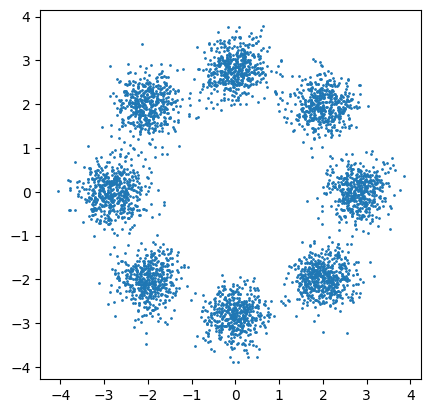

In [39]:
data_sample = gen_data(2 ** 12)

viz_2d_data(data_sample)

In [40]:
def train(model, time_sampler, gen_data_f):
    iter = 10 ** 5
    bs = 2 ** 10

    optim = torch.optim.Adam([*model.parameters(), *time_sampler.parameters()], lr=1e-3)

    pbar = trange(iter)
    for i in pbar:
        x = gen_data_f(bs)

        t, p = time_sampler(bs=bs)
        t, p = t.detach(), p.detach()

        loss = model(x, t)
        loss = loss / p + time_sampler.loss(loss.detach(), t)

        # plt.scatter(t[:, 0], loss.detach().numpy(), s=1)
        # plt.scatter(t[:, 0], p.detach().numpy(), s=1)
        # plt.show()

        loss = loss.mean()

        if (i + 1) % 100 == 0:
            pbar.set_description(f"{loss.item():.4f}")

        optim.zero_grad()
        loss.backward()
        optim.step()

In [41]:
transform = AffineTransformID()
#transform = AffineTransformHalfNeural(d=2)

# gamma = GammaLinear()
gamma = GammaVDM()

vol_eta = VolatilityEtaOne()
# vol_eta = VolatilityEtaNeural()

pred = Predictor(d=2)

ndm = NeuralDiffusion(transform, gamma, vol_eta, pred)

time_sampler = UniformBucketSampler()

train(model=ndm, time_sampler=time_sampler, gen_data_f=gen_data)

277.1028:  13%|█▎        | 13424/100000 [02:08<13:47, 104.66it/s]


KeyboardInterrupt: 

### Visualisation

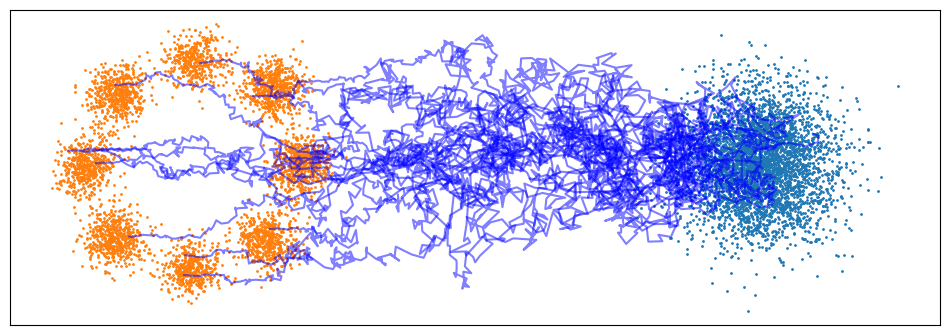

In [21]:
bs = 2 ** 12

z = torch.randn(bs, 2)


def sde(z_in, t_in):
    gmm, d_gmm = gamma(t_in)
    alpha_2 = gamma.alpha_2(gmm)
    sigma_2 = gamma.sigma_2(gmm)
    alpha = alpha_2 ** 0.5

    eta = vol_eta(t_in)

    g = (sigma_2 * d_gmm * eta) ** 0.5

    x_ = pred(z_in, t_in)

    (m_, _), (d_m_, _) = transform(x_, t_in)

    drift = -alpha * d_gmm * (1 + eta) / 2 * m_ + \
            alpha * d_m_ + \
            0.5 * d_gmm * (alpha_2 + eta) * z_in

    return drift, g


_, (t_steps, path) = solve_sde(sde=sde, z=z, ts=1, tf=0, n_steps=300)

viz_2d_path(t_steps, path, n_lines=16, color="blue")

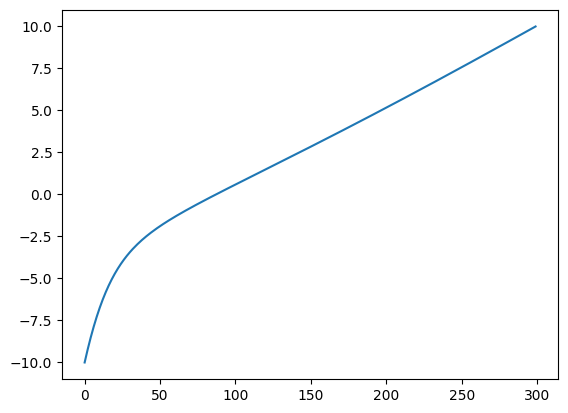

In [22]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, _ = gamma(t)

    plt.plot(g)
    plt.show()